## Instalação de lib's

In [ ]:
!pip install torch transformers --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 110.0 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import torch
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold

In [ ]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.7 MB/s eta 0:00:00


In [ ]:
import pickle
with open("/content/call_graph_with_label.pkl", "rb") as f:
    call_graph = pickle.load(f)
print(f"✅ Loaded graph with {call_graph.number_of_nodes()} nodes and {call_graph.number_of_edges()} edges")

✅ Loaded graph with 14000 nodes and 24066 edges


In [ ]:
import networkx as nx
import statistics

density = nx.density(call_graph)
print(f"📈 Density: {density:.4f}")

📈 Density: 0.0001


In [ ]:
isolates = list(nx.isolates(call_graph))
print(f"🗑️ Isolated nodes: {len(isolates)}")

🗑️ Isolated nodes: 0


In [ ]:
undirected = call_graph.to_undirected()
n_components = nx.number_connected_components(undirected)
components = sorted(nx.connected_components(undirected), key=len, reverse=True)
largest = len(components[0]) if components else 0
print(f"🔗 Connected components: {n_components}")
print(f"   – Largest component size: {largest}")

🔗 Connected components: 173
   – Largest component size: 13314


In [ ]:
degrees = [d for _, d in call_graph.degree()]
print(f"📐 Min degree: {min(degrees)}")
print(f"📐 Max degree: {max(degrees)}")
print(f"📐 Avg degree: {statistics.mean(degrees):.2f}")

📐 Min degree: 1
📐 Max degree: 5559
📐 Avg degree: 3.44


In [ ]:
top5 = sorted(call_graph.degree(), key=lambda x: x[1], reverse=True)[:5]
print("⭐ Top 5 nodes by degree:")
for node, deg in top5:
    print(f"   • {node}: {deg}")

⭐ Top 5 nodes by degree:
   • saleor:get_graphql_content: 5559
   • saleor:get_plugins_manager: 1107
   • saleor:to_global_id_or_none: 904
   • saleor:fetch_checkout_lines: 721
   • saleor:fetch_checkout_info: 670


In [ ]:
first_node = next(iter(call_graph.nodes()))
print(f"\nFirst node: {first_node}")
print("Code snippet:\n")
print(call_graph.nodes[first_node]["code"])


First node: saleor:get_bool_from_env
Code snippet:

def get_bool_from_env(name, default_value):
    """Retrieve and convert an environment variable to a boolean object.

    Accepted values are `true` (case-insensitive) and `1`, any other value resolves to `False`.
    """
    value = os.environ.get(name)
    if value is None:
        return default_value
    return value.lower() in ("true", "1")


In [ ]:
import textwrap
import re

for src, dst in call_graph.edges():
    snippet = call_graph.nodes[src]["code"]
    svc_src, fn_src = src.split(":", 1)
    svc_dst, fn_dst = dst.split(":", 1)

    print(f"\n📌 Edge: {src} → {dst}")
    print(f"--- Source Function `{fn_src}` in service `{svc_src}` ---")
    code = textwrap.dedent(snippet)
    print(code)

    pattern = rf"\b{re.escape(fn_dst)}\s*\("
    matches = list(re.finditer(pattern, code))
    if matches:
        for m in matches:
            line_no = code[:m.start()].count("\n") + 1
            line = code.splitlines()[line_no-1]
            print(f"    -> calls `{fn_dst}` at line {line_no}: {line.strip()}")
    else:
        print(f"    ⚠️ No explicit call to `{fn_dst}` found in this snippet")


A saída de streaming foi truncada nas últimas 5000 linhas.
    order.voucher = voucher_2
    order.voucher_code = voucher_2.codes.first().code

    # when
    create_or_update_voucher_discount_objects_for_order(order)
    order, lines = fetch_order_prices_if_expired(order, plugins_manager, None, True)

    # then
    line_1, line_2 = lines
    assert line_1.base_unit_price_amount == line_1.undiscounted_base_unit_price_amount
    assert (
        line_1.total_price_gross_amount
        == line_1.undiscounted_base_unit_price_amount * line_1.quantity * tax_rate
    )
    assert (
        line_1.undiscounted_total_price_gross_amount
        == line_1.undiscounted_base_unit_price_amount * line_1.quantity * tax_rate
    )
    assert line_1.unit_discount_amount == 0
    assert line_1.unit_discount_type is None
    assert line_1.unit_discount_reason is None
    assert line_1.unit_discount_value == 0

    assert line_2.base_unit_price_amount == line_2.undiscounted_base_unit_price_amount
    ass

## Importação do GraphCodeBERT

In [ ]:
from transformers import RobertaTokenizer, RobertaModel

tokenizer = RobertaTokenizer.from_pretrained("microsoft/graphcodebert-base")
model = RobertaModel.from_pretrained("microsoft/graphcodebert-base")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/539 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at microsoft/graphcodebert-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.eval()

RobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(50265, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0-11): 12 x RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dr

In [ ]:
import torch

In [ ]:
node_list   = list(call_graph.nodes())
node_labels    = [call_graph.nodes[n]["label"] for n in node_list]
node_snippets  = [call_graph.nodes[n]["code"]  for n in node_list]

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
labels = torch.tensor(node_labels, dtype=torch.long).to(device)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
num_classes = int(labels.max()) + 1

In [ ]:
print(num_classes)

6


In [ ]:
cls_embeddings = []

In [ ]:
from torch.utils.data import DataLoader

class SnippetDataset(torch.utils.data.Dataset):
    def __init__(self, snippets, tokenizer, max_length=512):
        self.snippets = snippets
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.snippets)

    def __getitem__(self, idx):
        return self.snippets[idx]

    def collate_fn(self, batch):
        return self.tokenizer(
            batch,
            padding="max_length",
            truncation=True,
            max_length=self.max_length,
            return_tensors="pt"
        )

dataset = SnippetDataset(node_snippets, tokenizer)
loader = DataLoader(dataset, batch_size=8, collate_fn=dataset.collate_fn, num_workers=2)

cls_embs = []
model.to("cuda")
for batch in loader:
    batch = {k: v.to("cuda") for k,v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)
    hidden = outputs.last_hidden_state
    cls_embs.append(hidden[:, 0, :])
    mean_embs.append(hidden.mean(dim=1))
    max_embs.append(hidden.max(dim=1).values)

cls_embeddings = torch.cat(cls_embs, dim=0)

In [ ]:
print(cls_embeddings)

tensor([[ 0.4062,  0.3833,  0.0812,  ..., -0.1771, -0.5108,  0.6376],
        [-0.0799,  0.1929, -0.0256,  ..., -0.3832, -0.2807, -0.0093],
        [ 0.1478, -0.2478, -0.2066,  ..., -0.1152, -0.1533,  0.5051],
        ...,
        [ 0.0744,  0.0625,  0.0677,  ..., -0.4359, -0.2971,  0.5930],
        [ 0.0219, -0.0619,  0.1612,  ..., -0.0256, -0.4608,  0.4609],
        [-0.0272, -0.1176,  0.1529,  ..., -0.2747, -0.5822,  0.6020]],
       device='cuda:0')


In [ ]:
import torch

node_list = list(call_graph.nodes())
name2idx  = {name: i for i, name in enumerate(node_list)}
edge_idx  = [
    [ name2idx[src], name2idx[dst] ]
    for src, dst in call_graph.edges()
]
edge_index = torch.tensor(edge_idx, dtype=torch.long).t().contiguous()
print("edge_index shape:", edge_index.shape)

edge_index shape: torch.Size([2, 24066])


In [ ]:
print("Arestas no call_graph:", call_graph.number_of_edges())

Arestas no call_graph: 24066


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from torch_geometric.data import Data

data = Data(
    x=node_features_cls,
    edge_index=edge_index,
    y=labels
)
print(data)

Data(x=[14000, 768], edge_index=[2, 24066], y=[14000])


In [ ]:
data = data.to(device)

In [ ]:
torch.manual_seed(42)

In [ ]:
from sklearn.model_selection import train_test_split

y_cpu = data.y.cpu().numpy()

idx = list(range(data.num_nodes))
train_idx, test_idx = train_test_split(
    idx,
    test_size=0.2,
    random_state=42,
    stratify=y_cpu
)

In [ ]:
data.train_mask = torch.zeros(data.num_nodes, dtype=torch.bool, device=device)
data.test_mask  = torch.zeros(data.num_nodes, dtype=torch.bool, device=device)
data.train_mask[train_idx] = True
data.test_mask[test_idx]   = True

In [ ]:
train_labels   = data.y[data.train_mask]
class_counts   = torch.bincount(train_labels)
class_weights  = 1.0 / class_counts.float()
class_weights /= class_weights.sum()
class_weights *= class_counts.numel()
class_weights = class_weights.to(device)

In [ ]:
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

In [ ]:
import os
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, GATConv, GATv2Conv
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [ ]:
class GCNNet(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.5, training=self.training)
        return self.conv2(x, edge_index)

class GATNet(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, heads=4):
        super().__init__()
        self.conv1 = GATConv(in_channels, hidden_channels, heads=heads)
        self.conv2 = GATConv(hidden_channels * heads, num_classes, heads=1, concat=False)

    def forward(self, x, edge_index):
        x = F.elu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.5, training=self.training)
        return self.conv2(x, edge_index)

class GATv2Net(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, heads=4):
        super().__init__()
        self.conv1 = GATv2Conv(in_channels, hidden_channels, heads=heads, concat=True)
        self.conv2 = GATv2Conv(hidden_channels * heads, num_classes, heads=1, concat=False)

    def forward(self, x, edge_index):
        x = F.elu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.5, training=self.training)
        return self.conv2(x, edge_index)

In [ ]:
def train_epoch(model, data, optimizer, criterion):
    model.train()
    optimizer.zero_grad()
    out   = model(data.x, data.edge_index)
    loss  = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

In [ ]:
@torch.no_grad()
def evaluate(model, data):
    model.eval()
    logits = model(data.x, data.edge_index)
    probs  = F.softmax(logits, dim=1)
    preds  = probs.argmax(dim=1)

    y_true = data.y.cpu().numpy()
    y_pred = preds.cpu().numpy()
    mask_train = data.train_mask.cpu().numpy()
    mask_test  = data.test_mask.cpu().numpy()

    metrics = {}
    for split, mask in [("train", mask_train), ("test", mask_test)]:
        acc = accuracy_score(y_true[mask], y_pred[mask])
        f1  = f1_score(y_true[mask], y_pred[mask], average="macro")
        y_oh = torch.nn.functional.one_hot(data.y, num_classes).cpu().numpy()
        auc  = roc_auc_score(y_oh[mask], probs.cpu().numpy()[mask], multi_class="ovr")
        metrics[split] = {"acc": acc, "f1": f1, "auc": auc}
    return metrics

In [ ]:
results = {}
for ModelClass in (GCNNet, GATNet, GATv2Net):
    model     = ModelClass(in_channels=data.num_features, hidden_channels=32).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)

    for epoch in range(1, 101):
        loss = train_epoch(model, data, optimizer, criterion)
        if epoch % 20 == 0:
            print(f"{ModelClass.__name__} Epoch {epoch:03d} Loss {loss:.4f}")

    metrics = evaluate(model, data)
    results[ModelClass.__name__] = metrics
    print(f"\n=== {ModelClass.__name__} Results ===")
    print(" Train →", metrics["train"])
    print(" Test  →", metrics["test"], "\n")

GCNNet Epoch 020 Loss 1.4765
GCNNet Epoch 040 Loss 1.3294
GCNNet Epoch 060 Loss 1.2456
GCNNet Epoch 080 Loss 1.1829
GCNNet Epoch 100 Loss 1.1603

=== GCNNet Results ===
 Train → {'acc': 0.6682142857142858, 'f1': 0.4687297982294117, 'auc': np.float64(0.8698555603530941)}
 Test  → {'acc': 0.6571428571428571, 'f1': 0.38995116057746276, 'auc': np.float64(0.8537168342129243)} 

GATNet Epoch 020 Loss 1.3429
GATNet Epoch 040 Loss 1.0178
GATNet Epoch 060 Loss 0.8635
GATNet Epoch 080 Loss 0.7646
GATNet Epoch 100 Loss 0.6857

=== GATNet Results ===
 Train → {'acc': 0.7150892857142858, 'f1': 0.5006954397243758, 'auc': np.float64(0.9306935097011148)}
 Test  → {'acc': 0.69, 'f1': 0.38940394642796883, 'auc': np.float64(0.8922371271208283)} 

GATv2Net Epoch 020 Loss 1.3329
GATv2Net Epoch 040 Loss 0.9989
GATv2Net Epoch 060 Loss 0.8483
GATv2Net Epoch 080 Loss 0.7262
GATv2Net Epoch 100 Loss 0.6641

=== GATv2Net Results ===
 Train → {'acc': 0.7235714285714285, 'f1': 0.5403655418722888, 'auc': np.float64(

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, GATConv, GATv2Conv
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import pandas as pd
from itertools import product


def hyperparameter_search(model_cls, param_grid):
    records = []
    for params in product(*param_grid.values()):
        cfg = dict(zip(param_grid.keys(), params))

        if model_cls is GCNNet:
            model = model_cls(in_channels=data.num_features,
                              hidden_channels=cfg["hidden"]).to(device)
        else:
            model = model_cls(in_channels=data.num_features,
                              hidden_channels=cfg["hidden"],
                              heads=cfg["heads"]).to(device)

        optimizer = torch.optim.Adam(
            model.parameters(),
            lr=cfg["lr"],
            weight_decay=cfg["wd"]
        )

        for epoch in range(1, 101):
            train_epoch(model, data, optimizer, criterion)

        # Evaluate
        metrics = evaluate(model, data)["test"]
        records.append({
            "model": model_cls.__name__,
            **cfg,
            "test_acc": metrics["acc"],
            "test_f1":  metrics["f1"],
            "test_auc": metrics["auc"]
        })

    return pd.DataFrame.from_records(records)

In [ ]:
param_grid_common = {
    "hidden":      [32, 64],
    "lr":          [1e-3, 5e-3],
    "wd":          [5e-4, 1e-3]
}
param_grid_gat = {**param_grid_common, "heads": [2, 4]}

In [ ]:
df_gcn   = hyperparameter_search(GCNNet, param_grid_common)
df_gat   = hyperparameter_search(GATNet, param_grid_gat)
df_gatv2 = hyperparameter_search(GATv2Net, param_grid_gat)

In [ ]:
df_all = pd.concat([df_gcn, df_gat, df_gatv2], ignore_index=True)
df_all = df_all.sort_values("test_auc", ascending=False)

In [ ]:
display(df_all.head(5))

,model,hidden,lr,wd,test_acc,test_f1,test_auc,heads
22,GATNet,64,0.005,0.0010,0.716786,0.439013,0.908695,2.0
28,GATv2Net,32,0.005,0.0005,0.722500,0.417547,0.905678,2.0
29,GATv2Net,32,0.005,0.0005,0.714286,0.388458,0.903385,4.0
20,GATNet,64,0.005,0.0005,0.695714,0.425506,0.901969,2.0
36,GATv2Net,64,0.005,0.0005,0.717500,0.415737,0.899681,2.0


## GraphSmote

In [ ]:
!git clone https://github.com/TianxiangZhao/GraphSmote.git
%cd GraphSmote

Cloning into 'GraphSmote'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 89 (delta 24), reused 16 (delta 16), pack-reused 59 (from 1)
Receiving objects: 100% (89/89), 82.61 KiB | 3.18 MiB/s, done.
Resolving deltas: 100% (37/37), done.
/content/GraphSmote


In [ ]:
!find /content/GraphSmote -maxdepth 2 -type f | sed 's/\/content\/GraphSmote\///g'

main.py
README.md
data/twitter_fake_ids.csv
data/Put_dataset_folder_here
.git/index
.git/description
.git/config
.git/HEAD
.git/packed-refs
data_load.py
models.py
utils.py


In [ ]:
!pip install ipdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.9 MB/s eta 0:00:00


In [ ]:
import torch
import numpy as np
from torch_geometric.utils import to_dense_adj
import time
import argparse
import numpy as np
import torch
import torch.nn.functional as F
import torch.optim as optim
import random
import ipdb
import copy

In [ ]:
X = node_features_cls.cpu().numpy()
y = data.y.cpu().numpy()

In [ ]:
features = data.x.cpu().numpy()
labels   = data.y.cpu().numpy()

In [ ]:
!touch /content/GraphSmote-main

In [ ]:
import sys
sys.path.append("/content/GraphSmote-main")

from utils import recon_upsample
from torch_geometric.utils import to_dense_adj

In [ ]:
adj = to_dense_adj(data.edge_index)[0]

In [ ]:
idx_train = data.train_mask.nonzero(as_tuple=False).view(-1)

In [ ]:
portion     = 1.0
im_class_num= num_classes

In [ ]:
result = recon_upsample(
    embed        = data.x,
    labels       = data.y,
    idx_train    = idx_train,
    adj          = adj,
    portion      = 0.0,
    im_class_num = num_classes
)

In [ ]:
for i, tensor in enumerate(result):
    print(f"result[{i}] shape:", tensor.shape)

result[0] shape: torch.Size([23017, 768])
result[1] shape: torch.Size([23017])
result[2] shape: torch.Size([20217])
result[3] shape: torch.Size([23017, 23017])


In [ ]:
print("Returned", len(result), "elements:", [type(r) for r in result])

Returned 4 elements: [<class 'torch.Tensor'>, <class 'torch.Tensor'>, <class 'torch.Tensor'>, <class 'torch.Tensor'>]


In [ ]:
raw = result[0]
loss_recon = raw.mean()
print("🤖 Recon loss (scalar):", loss_recon.item())

🤖 Recon loss (scalar): 0.0585014782845974


In [ ]:
loss_recon = raw.sum()
print("🤖 Recon loss (sum):", loss_recon.item())

🤖 Recon loss (sum): 1034133.875


In [ ]:
N = data.x.size(0)
synth = embed_new[N:]
orig_pad = embed_new[:N].detach()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

N = data.x.size(0)
synth = embed_new[N:].cpu().numpy()
orig  = embed_new[:N].cpu().numpy()

sim_matrix = cosine_similarity(synth, orig)
best_sim   = sim_matrix.max(axis=1)

print("Mean max cosine sim (synth→orig):", best_sim.mean())

Mean max cosine sim (synth→orig): 0.9979819


In [ ]:
from collections import Counter

labels_all = result[1].cpu().tolist()
dist = Counter(labels_all)

print("Distribuição de classes após GraphSMOTE:")
for cls, cnt in sorted(dist.items()):
    print(f"  Classe {cls}: {cnt} nós")

Distribuição de classes após GraphSMOTE:
  Classe 0: 10882 nós
  Classe 1: 3946 nós
  Classe 2: 2439 nós
  Classe 3: 1955 nós
  Classe 4: 1902 nós
  Classe 5: 1893 nós


In [ ]:
from torch_geometric.utils import dense_to_sparse
from torch.optim import Adam

In [ ]:
edge_index_new, _ = dense_to_sparse(adj_new)

In [ ]:
labels_all = torch.tensor(labels_all, dtype=torch.long, device=embed_new.device)
data_new = Data(
    x=embed_new,
    edge_index=edge_index_new,
    y=labels_all
)


In [ ]:
idx = torch.arange(data_new.num_nodes)
train_idx, test_idx = train_test_split(
    idx.cpu().numpy(),
    test_size=0.2,
    random_state=42,
    stratify=data_new.y.cpu().numpy()
)
train_mask = torch.zeros(data_new.num_nodes, dtype=torch.bool, device=embed_new.device)
test_mask  = torch.zeros_like(train_mask)
train_mask[train_idx] = True
test_mask[test_idx]   = True

data_new.train_mask = train_mask
data_new.test_mask  = test_mask

In [ ]:
num_classes = int(data_new.y.max()) + 1

In [ ]:
train_labels  = data_new.y[data_new.train_mask]
class_counts  = torch.bincount(train_labels)
class_weights = (1.0 / class_counts.float())
class_weights = (class_weights / class_weights.sum() * len(class_counts)).to(device)

In [ ]:
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

In [ ]:
models = {
    "GCN":   GCNNet(data_new.num_features, 64),
    "GAT":   GATNet(data_new.num_features, 32, heads=4),
    "GATv2": GATv2Net(data_new.num_features, 32, heads=4),
}

In [ ]:
def train_epoch(model, data, optimizer, criterion):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

@torch.no_grad()
def evaluate(model, data):
    model.eval()
    logits = model(data.x, data.edge_index)
    probs  = F.softmax(logits, dim=1)
    preds  = probs.argmax(dim=1)

    y_true = data.y.cpu().numpy()
    y_pred = preds.cpu().numpy()
    mask_train = data.train_mask.cpu().numpy()
    mask_test  = data.test_mask.cpu().numpy()

    results = {}
    for split, mask in [("train", mask_train), ("test", mask_test)]:
        acc = accuracy_score(y_true[mask], y_pred[mask])
        f1  = f1_score(y_true[mask], y_pred[mask], average="macro", zero_division=0)
        y_oh = torch.nn.functional.one_hot(data.y, num_classes=logits.size(1)).cpu().numpy()
        auc = roc_auc_score(y_oh[mask], probs[mask].cpu().numpy(), multi_class="ovr")
        results[split] = {"acc": acc, "f1": f1, "auc": auc}
    return results

results = {}
for name, model in models.items():
    model = model.to(device)
    optimizer = Adam(model.parameters(), lr=5e-3, weight_decay=5e-4)

    for epoch in range(1, 101):
        loss = train_epoch(model, data_new, optimizer, criterion)
        if epoch % 20 == 0:
            print(f"{name} Epoch {epoch:03d} Loss {loss:.4f}")

    metrics = evaluate(model, data_new)
    results[name] = metrics
    print(f"\n=== {name} Results ===")
    print(" Train →", metrics["train"])
    print(" Test  →", metrics["test"])
    print("-" * 40)

GCN Epoch 020 Loss 1.4138
GCN Epoch 040 Loss 1.2639
GCN Epoch 060 Loss 1.2097
GCN Epoch 080 Loss 1.1581
GCN Epoch 100 Loss 1.0966

=== GCN Results ===
 Train → {'acc': 0.6392222886004454, 'f1': 0.5350895549866298, 'auc': np.float64(0.9076485239413487)}
 Test  → {'acc': 0.6301042571676803, 'f1': 0.5304327196032482, 'auc': np.float64(0.9046073876756507)}
----------------------------------------
GAT Epoch 020 Loss 1.5107
GAT Epoch 040 Loss 1.2170
GAT Epoch 060 Loss 1.0893
GAT Epoch 080 Loss 0.9912
GAT Epoch 100 Loss 0.8399

=== GAT Results ===
 Train → {'acc': 0.7101504371911149, 'f1': 0.6594440747012835, 'auc': np.float64(0.9396169085869799)}
 Test  → {'acc': 0.6991746307558645, 'f1': 0.6515890632435107, 'auc': np.float64(0.9362536798521818)}
----------------------------------------
GATv2 Epoch 020 Loss 1.4318
GATv2 Epoch 040 Loss 1.2066
GATv2 Epoch 060 Loss 1.0629
GATv2 Epoch 080 Loss 0.9214
GATv2 Epoch 100 Loss 0.7837

=== GATv2 Results ===
 Train → {'acc': 0.7135176234182371, 'f1': 0.

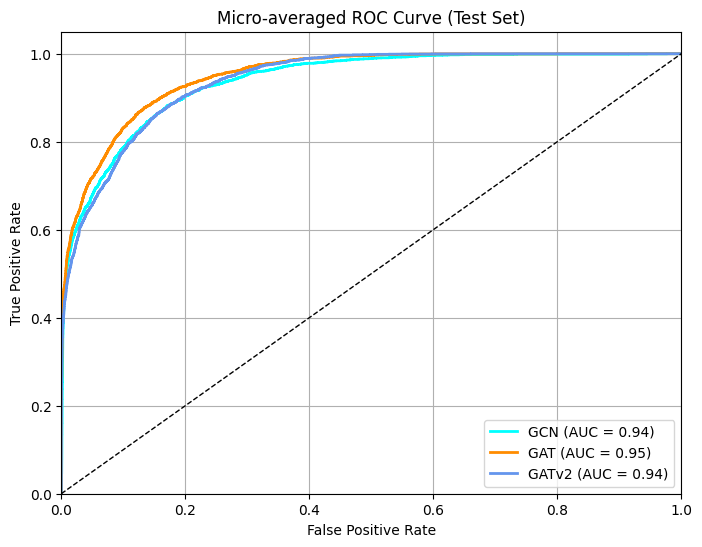

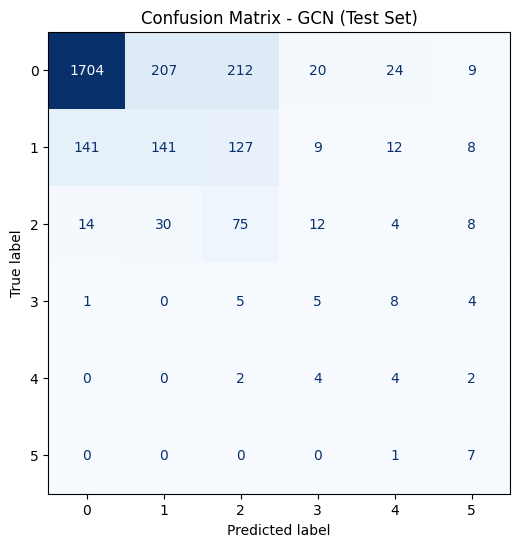

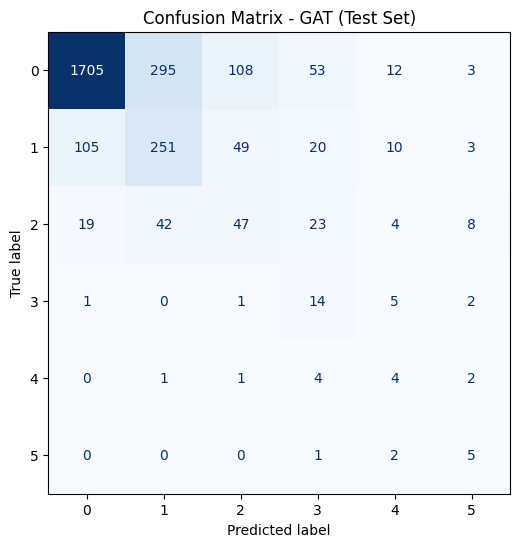

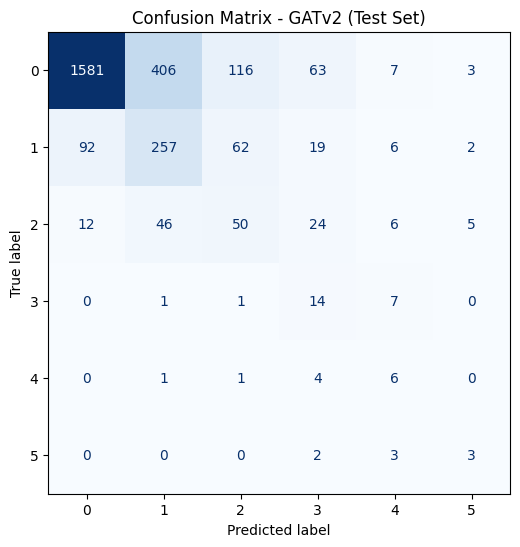

In [ ]:
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import torch
import numpy as np

y_true = data.y.cpu().numpy()
n_classes = int(data.y.max()) + 1

y_onehot = torch.nn.functional.one_hot(data.y, num_classes=n_classes).cpu().numpy()
test_mask = data.test_mask.cpu().numpy()

plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

for (name, model), color in zip(models.items(), colors):
    model.eval()
    logits = model(data.x.to(device), data.edge_index.to(device))
    probs  = torch.softmax(logits, dim=1).cpu().detach().numpy()
    fpr, tpr, _ = roc_curve(y_onehot[test_mask].ravel(), probs[test_mask].ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0,1],[0,1],'k--',lw=1)
plt.xlim([0,1]); plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-averaged ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

for name, model in models.items():
    model.eval()
    logits = model(data.x.to(device), data.edge_index.to(device))
    preds  = logits.argmax(dim=1).cpu().numpy()

    cm = confusion_matrix(y_true[test_mask], preds[test_mask], labels=list(range(n_classes)))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(n_classes)))
    fig, ax = plt.subplots(figsize=(6, 6))
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    plt.title(f'Confusion Matrix - {name} (Test Set)')
    plt.show()

In [ ]:
param_grid_common = {
    "hidden":       [32, 64, 128, 256],
    "lr":           [1e-4, 5e-4, 1e-3, 5e-3, 1e-2],
    "wd":           [1e-4, 5e-4, 1e-3, 5e-3]
}
param_grid_gat = {
    **param_grid_common,
    "heads":        [1, 2, 4, 8]
}

In [ ]:
df_gcn   = hyperparameter_search(GCNNet,   param_grid_common)
df_gat   = hyperparameter_search(GATNet,   param_grid_gat)
df_gatv2 = hyperparameter_search(GATv2Net, param_grid_gat)

In [ ]:
df_all = pd.concat([df_gcn, df_gat, df_gatv2], ignore_index=True)
df_all = df_all.sort_values("test_auc", ascending=False).reset_index(drop=True)

In [ ]:
display(df_all.head(10))

,model,hidden,lr,wd,test_acc,test_f1,test_auc,heads
0,GATv2Net,64,0.010,0.0005,0.810357,0.440610,0.944762,1.0
1,GATv2Net,32,0.010,0.0010,0.802500,0.331355,0.941672,1.0
2,GATv2Net,32,0.010,0.0001,0.802500,0.371257,0.941099,1.0
3,GATv2Net,64,0.005,0.0001,0.812143,0.464436,0.940165,1.0
4,GATv2Net,128,0.010,0.0010,0.793929,0.347880,0.939574,1.0
5,GATv2Net,32,0.010,0.0005,0.791429,0.307988,0.939497,2.0
6,GATv2Net,128,0.010,0.0005,0.781786,0.342263,0.938797,1.0
7,GATv2Net,64,0.010,0.0005,0.794286,0.374010,0.938371,4.0
8,GATv2Net,32,0.005,0.0001,0.801786,0.486231,0.938362,4.0
9,GATv2Net,256,0.010,0.0001,0.802143,0.463167,0.938280,1.0


In [ ]:
HIDDEN_SIZE   = 64
LEARNING_RATE = 1e-2
WEIGHT_DECAY  = 5e-4
HEADS         = 1
EPOCHS        = 100
PRINT_EVERY   = 20

In [ ]:
best_model = GATv2Net(
    in_channels=data_new.num_node_features,
    hidden_channels=HIDDEN_SIZE,
    heads=HEADS,
).to(device)

In [ ]:
checkpoint_path = "/content/gatv2_best.pth"
torch.save(best_model.state_dict(), checkpoint_path)
print(f"Model weights saved to {checkpoint_path}")

Model weights saved to /content/gatv2_best.pth


In [ ]:
import torch
import torch.nn.functional as F

def cascade_effect(model, data, node_idx: int, sigma: float = 0.05):
    """
    Perturba o embedding de `node_idx` com ruído Gaussiano e
    mede o impacto na probabilidade de risco (classe 1) dele e
    dos seus vizinhos de saída.

    Parâmetros
    ----------
    model : GNN treinado em modo eval() e na mesma device de `data`
    data  : objeto PyG Data com .x, .edge_index, .y
    node_idx : índice do nó a ser perturbado
    sigma : desvio padrão do ruído (default 0.05)

    Retorna
    -------
    delta_self : float
        Mudança na probabilidade de risco do próprio nó perturbado.
    neighbour_ids : Tensor [k]
        Índices dos vizinhos de saída.
    neighbour_deltas : Tensor [k]
        Variação da probabilidade de risco em cada vizinho.
    cascade_strength : float
        Média do valor absoluto das variações nos vizinhos.
    """
    model.eval()

    with torch.no_grad():
        base_logits = model(data.x, data.edge_index)
        base_probs  = F.softmax(base_logits, dim=1)[:, 1]

    x_pert = data.x.clone()
    noise  = torch.randn_like(x_pert[node_idx]) * sigma
    x_pert[node_idx] += noise

    with torch.no_grad():
        pert_logits = model(x_pert, data.edge_index)
        pert_probs  = F.softmax(pert_logits, dim=1)[:, 1]

    delta_self = (pert_probs[node_idx] - base_probs[node_idx]).item()

    src, dst = data.edge_index
    neighbour_ids = dst[src == node_idx]
    neighbour_deltas = (pert_probs[neighbour_ids] -
                        base_probs[neighbour_ids]).cpu()

    cascade_strength = neighbour_deltas.abs().mean().item() if len(neighbour_deltas) else 0.0

    return delta_self, neighbour_ids, neighbour_deltas, cascade_strength

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

infer_model = GATv2Net(
    in_channels     = data_new.num_node_features,
    hidden_channels = 64,
    heads           = 1,

).to(device)
infer_model.load_state_dict(torch.load("/content/gatv2_best.pth", map_location=device))
infer_model.eval()

data_new = data_new.to(device)

node_id = 19
delta_self, nbrs, delta_nbrs, strength = cascade_effect(
    infer_model, data_new, node_id, sigma=1
)

print(f"Δ no nó {node_id}: {delta_self:+.4f}")
print(f"Vizinho(s): {nbrs.tolist()}")
for n, d in zip(nbrs.tolist(), delta_nbrs.tolist()):
    print(f"  Δ no vizinho {n}: {d:+.4f}")
print(f"Média |Δ| dos vizinhos: {strength:.4f}")

Δ no nó 19: +0.0026
Vizinho(s): [14017, 14046, 14075, 14104, 14133, 14162, 14191, 14220, 14249, 14278, 14307, 14336, 14365, 14394, 14423, 14452, 14481, 14510, 14539, 14568, 14597, 14626, 14655, 14684, 14713, 14742, 14771, 14800, 14829, 14858, 14887, 14916, 14945, 14974, 15003, 15032, 15061, 15090, 15119, 15148, 15177, 15206, 15235, 15264, 15293, 15322, 15351, 15380, 15409, 15438, 15467, 15496, 15525, 15554, 15583, 15612, 15641, 15670, 15699, 15728, 15757, 15786, 15815, 15844, 15871, 15916, 15961, 16006, 16051, 16096, 16141, 16186, 16231, 16276, 16321, 16366, 16411, 16456, 16501, 16546, 16591, 16636, 16681, 16726, 16771, 16816, 16861, 16906, 16951, 16996, 17041, 17086, 17131, 17176, 17221, 17266, 17311, 17356, 17401, 17446, 17491, 17536, 17581, 17626, 17671, 17715, 17784, 17785, 17786, 17787, 17788, 17789, 17807, 17876, 17877, 17878, 17879, 17880, 17881, 17899, 17968, 17969, 17970, 17971, 17972, 17973, 17991, 18060, 18061, 18062, 18063, 18064, 18065, 18083, 18152, 18153, 18154, 18155, 1

In [ ]:
import torch
import numpy as np
from tqdm import tqdm

def rank_cascade_nodes(model, data, sigma=0.05, top_k=10):
    N = data.num_nodes
    strengths = np.zeros(N)

    for n in tqdm(range(N), desc="Scanning nodes"):
        _, _, _, strength = cascade_effect(model, data, n, sigma=sigma)
        strengths[n] = strength

    top_idx = np.argsort(-strengths)[:top_k]
    return top_idx.tolist(), strengths[top_idx].tolist()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
infer_model.to(device).eval()
data_new = data_new.to(device)

top_nodes, top_strengths = rank_cascade_nodes(
    infer_model, data_new, sigma=0.05, top_k=10
)

print("\nTop 10 nós com maior cascade_strength:")
for rank, (n, s) in enumerate(zip(top_nodes, top_strengths), 1):
    print(f"{rank:>2}. nó {n:<6}  strength = {s:.4f}")

Scanning nodes: 100%|██████████| 23017/23017 [02:24<00:00, 158.83it/s]


Top 10 nós com maior cascade_strength:
 1. nó 3194    strength = 0.0245
 2. nó 2431    strength = 0.0211
 3. nó 11423   strength = 0.0209
 4. nó 11412   strength = 0.0206
 5. nó 2882    strength = 0.0196
 6. nó 12765   strength = 0.0184
 7. nó 1771    strength = 0.0177
 8. nó 3320    strength = 0.0176
 9. nó 8491    strength = 0.0173
10. nó 2992    strength = 0.0172
